In [18]:
# 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [19]:
# 2
df = pd.read_csv("dataset1_ori.csv")
df

,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,3.17,tepat
1,laki,bekerja,belum,3.30,tepat
2,perempuan,mhs,belum,3.01,tepat
3,perempuan,mhs,menikah,3.25,tepat
4,laki,bekerja,menikah,3.20,telat
5,laki,bekerja,menikah,2.50,telat
6,perempuan,bekerja,menikah,3.00,telat
7,perempuan,bekerja,belum,2.70,telat
8,laki,bekerja,belum,2.40,telat
9,perempuan,mhs,menikah,2.50,telat


In [20]:
# 3
X = df.drop(columns="lulus")
y = df.lulus


In [21]:
# 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((12, 4), (3, 4), (12,), (3,))

In [22]:
# 5
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["ipk"]),
    ('categoric', cat_pipe(encoder='onehot'), ['jenis_kelamin', 'pekerjaan', 'status']),
])


In [23]:
# 6
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])


In [24]:
# 7
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ipk']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['jenis_kelamin', 'pekerjaan',
                                                   'status'])])),
                ('algo', GaussianNB())])

In [25]:
# 8
pipeline.score(X_train, y_train)


0.9166666666666666

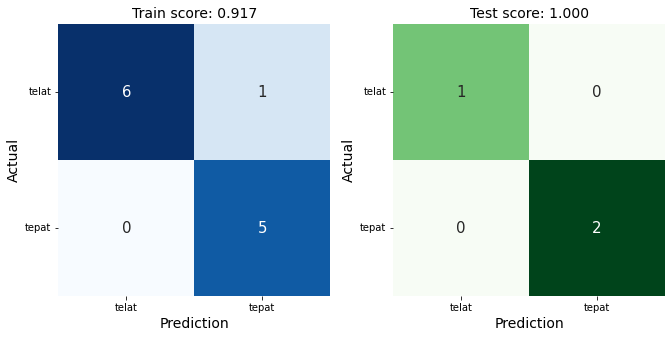

In [26]:
# 9
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)


In [28]:
# 10
X_pred = pd.read_csv("testing.csv")
X_pred


,jenis_kelamin,pekerjaan,status,ipk
0,laki,mhs,belum,2.7


In [12]:
# 11
pipeline.predict(X_pred)


array([0], dtype=int64)

In [13]:
# 12
X_pred["lulus"] = pipeline.predict(X_pred)
X_pred


,jenis_kelamin,pekerjaan,status,ipk,lulus
0,laki,mhs,belum,2.7,0
